## Import

In [1]:
import os
from os.path import dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib import cm
import scipy.stats as stats
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

## color and saving

In [2]:
color = "#9a3324"

cmap_color_start = "#00274C"
cmap_color_end = "#FFCB05"
cmap_name = "blue2maize"

folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/c_boundary_w_RNAtracks/example_zoomed_in_tracks"
os.chdir(folder_save)

fname_save_prefix = "zoomed_in_RNA_track-medium-1"
switch_read_from_file = False

## Raw data for the track (Option 1: Mannualy input)

In [3]:
t = np.array([66, 67, 68, 69, 70, 71, 72, 73, 74])

x = np.array([359.0999603216336, 359.1518357880511, 359.16992333346207, 359.07353161911885, 358.9427875637448, 358.9907009993234, 359.0664234042857, 359.01675923600965, 359.07413426609133])

y = np.array([293.6775698443444, 293.8412718088889, 293.7338226474401, 293.7927171387158, 293.6275252912915, 293.4037061460879, 293.49352039458955, 293.4134967144984, 293.63256185659424])

MSD = np.array([0.0003847414861754311, 0.0005691466835525396, 0.0010144209807679912, 0.0013070307230908438, 0.0012555662632979016, 0.0011666013309117984])

tau = np.array([0.02, 0.04, 0.06, 0.08, 0.1, 0.12])

## Transform to physical unit

In [4]:
nm_per_pxl = 117
s_per_frame = 0.02

x = (x - (x.min() + x.max())/2) * nm_per_pxl
y = (y - (y.min() + y.max())/2) * nm_per_pxl
t = (t - t[0]) * s_per_frame

## Raw data for the track (Option 2: from file)

In [5]:
if switch_read_from_file:
    df_load = pd.read_csv(fname_save_prefix + "-data.csv")
    t = df_load[df_load["variable"] == "t_s"]["value"].to_numpy(dtype=float)
    x = df_load[df_load["variable"] == "x_nm"]["value"].to_numpy(dtype=float)
    y = df_load[df_load["variable"] == "y_nm"]["value"].to_numpy(dtype=float)
    MSD = df_load[df_load["variable"] == "MSD_um2"]["value"].to_numpy(dtype=float)
    tau = df_load[df_load["variable"] == "tau_s"]["value"].to_numpy(dtype=float)

## Save data for replot

In [6]:
value = np.concatenate([t, x, y, MSD, tau])
variable = np.concatenate([
    np.repeat("t_s", t.shape[0]),
    np.repeat("x_nm", x.shape[0]),
    np.repeat("y_nm", y.shape[0]),
    np.repeat("MSD_um2", MSD.shape[0]),
    np.repeat("tau_s", tau.shape[0]),
])
df_save = pd.DataFrame({
    "variable":variable,
    "value":value,
}, dtype=object)
df_save.to_csv(fname_save_prefix + "-data.csv", index=False)

# Plot RNA track

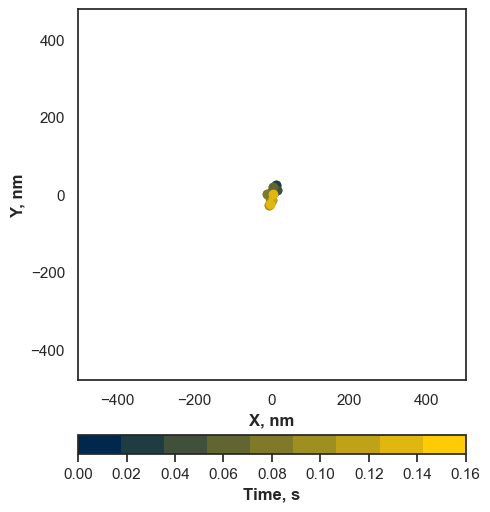

In [7]:
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name, [cmap_color_start, cmap_color_end], N=x.shape[0]
)

plt.figure(figsize=(5,6.5))
for i in range(len(t) - 1):
    plt.plot(
        x[i : i + 2],
        y[i : i + 2],
        "-o",
        color=cmap(i/ len(t)),
        linewidth=3,
    )
plt.axis("equal")
plt.xlabel("X, nm", weight='bold')
plt.ylabel("Y, nm", weight='bold')
cbar = plt.colorbar(cm.ScalarMappable(norm=clr.Normalize(t[0], t[-1]), cmap=cmap), ax=plt.gca(), orientation="horizontal", pad=0.11, fraction=0.15)
cbar.set_label(label='Time, s', weight='bold')
plt.savefig(fname_save_prefix + "-track-autoscale.png", format='png', dpi=600, bbox_inches='tight')
plt.xlim(-500, 500)
plt.ylim(-500, 500)
plt.savefig(fname_save_prefix + "-track-1umscale.png", format='png', dpi=600, bbox_inches='tight')
plt.show()

# Plot MSD-tau

## Equation:

- MSD = 2 n D tau^alpha = 4 D tau^alpha
- log(MSD) = alpha * log(tau) + log(D) + log(4)
- slope = alpha; intercept = log(D) + log(4)

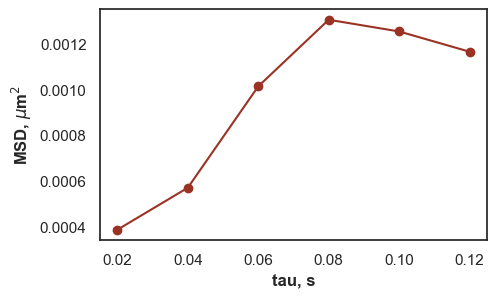

In [8]:
plt.figure(figsize=(5,3))
plt.plot(tau, MSD, color=color, ls='-', marker='o', label="All")
plt.xlabel("tau, s", weight='bold')
plt.ylabel(r"MSD, $\mu$m$^{2}$", weight='bold')
plt.savefig(fname_save_prefix + "-MSDtau.png", format='png', dpi=600, bbox_inches='tight')
plt.show()

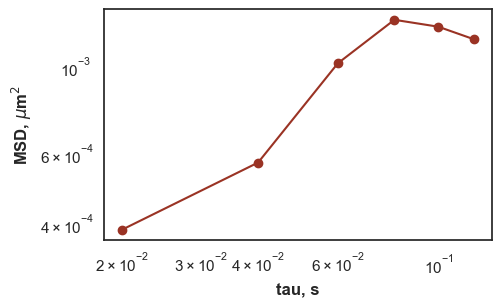

In [9]:
plt.figure(figsize=(5,3))
plt.plot(tau, MSD, color=color, ls='-', marker='o', label="All")
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.xlabel("tau, s", weight='bold')
plt.ylabel(r"MSD, $\mu$m$^{2}$", weight='bold')
plt.savefig(fname_save_prefix + "-MSDtau-loglog.png", format='png', dpi=600, bbox_inches='tight')
plt.show()

## Max d to center

In [10]:
max_d_to_center = np.sqrt(np.max((x - x.mean())**2 + (y -  y.mean())**2))
d_to_center = np.sqrt((x - x.mean())**2 + (y -  y.mean())**2)
max_d_to_center

27.368462558070945

## Max d to start

In [11]:
max_d_to_start = np.sqrt(np.max((x - x[0])**2 + (y -  y[0])**2))
d_to_start = np.sqrt((x - x[0])**2 + (y -  y[0])**2)
max_d_to_start

34.49792661435348

## Max d between any two points

In [12]:
np.max(np.sqrt((x-np.atleast_2d(x).T)**2 + (y-np.atleast_2d(y).T)**2))

54.55615147137104

In [13]:
vals, counts = np.unique(x, return_counts=True)
counts.max()

1

In [14]:
vals, counts = np.unique(y, return_counts=True)
counts.max()

1